<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Exploratory Data Analysis - IPL Data  By: Kaushik Rathod

### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source and data set](#section102)<br/>
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [dtypes](#section301)<br/>
    - 3.2 [head](#section302)<br/>
    - 3.3 [describe](#section303)<br/>
    - 3.4 [sample](#section304)<br/>
    - 3.5 [Pandas profiling](#section305)<br/>
    - 3.6 [Initial observations](#section306)<br/>
    - 3.7 [Final observations](#section307)<br/>
- 4. [Data normalization](#section4)</br>
    - 4.1 [Standardize column headers to lower case](#section401)<br/>
    - 4.2 [Convert timestamp to date-time](#section402)<br/>
    - 4.3 [Missing data and its imputation](#section403)<br/>
    - 4.4 [Outlier Treatment](#section404)<br/>
    - 4.5 [Handling NaN data in categorical variables](#section405)<br/>            
    - 4.6 [Grouping](#section406)<br/>
- 5. [Identify patterns in the data](#section5)</br>
    - 5.1 [Toss Winner vs Winner](#section501)<br/>
    - 5.2 [Toss Decision vs Winner](#section502)<br/>
    - 5.3 [Winner vs DL Applied](#section503)<br/>
    - 5.4 [Season vs Winner](#section503)<br/>
    - 5.5 [Using donut pie chart_to see the relationship between seasonwise match count](#section507)<br/>
- 6. [Analysis through questions](#section6)</br>
     - 6.1 [What does the dataset contain?](#section601)<br/>
         - 6.1.1 [How many years of data are there in the dataset?](#section602)<br/>
         - 6.1.2 [How many matches are there in the dataset?](#section603)<br/>
         - 6.1.3 [Which Team had won / lose  maximum matches?](#section604)<br/>
         - 6.1.4 [Which Team had won/lose matches by maximum runs? Top 5 Big wins & Top 5 Big Loses](#section605)<br/>
         - 6.1.5 [Who won maximum time player of the Match awards?](#section605)<br/>
     - 6.2 [Who is doing better when DL applied.](#section605)<br/>
         - 6.2.1 [In DL rules which team had more success?](#section605)<br/>
         - 6.2.2 [In DL rules what is better bat or field first?](#section605)<br/>
- 7. [Conclusion](#section7)<br/>

<a id=section1></a> 
## 1. Problem Statement 
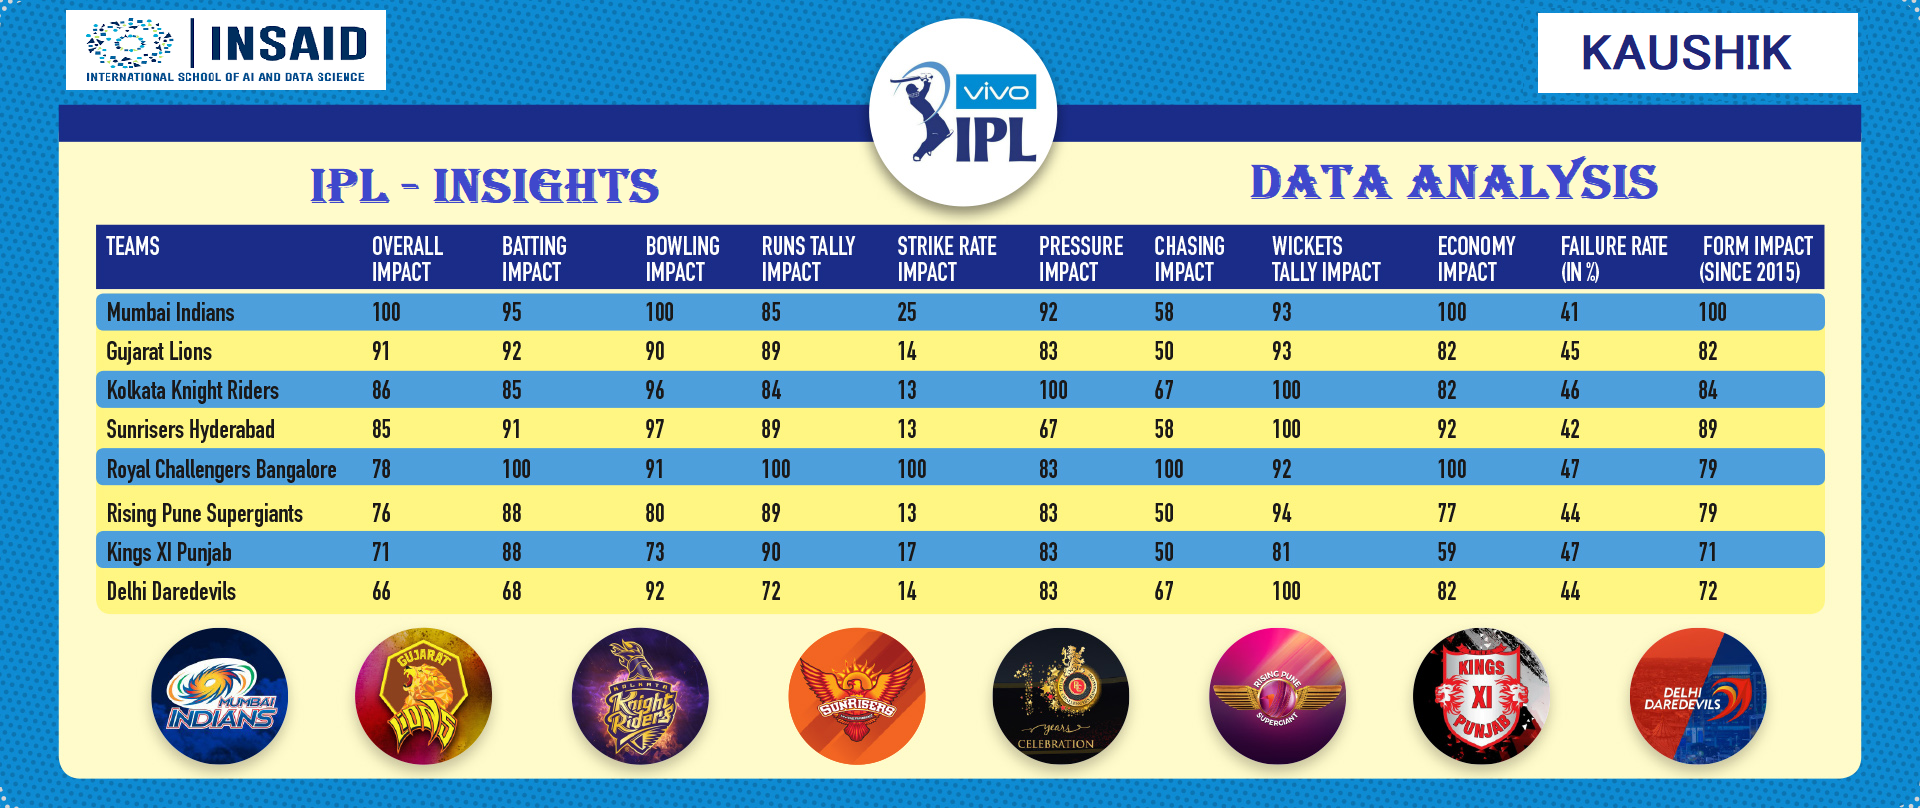

#### This Exploratory Data Analysis will help us 
- To find patterns in data, determining relationships in data
- Identify success rate of each team based on history
- To identify the team that has more chance to win the upcoming seasons
- Who is doing good in DL situation



<a id=section101></a> 
### 1.1. Introduction
This Exploratory Data Analysis is to practice Python skills learned till now on a structured data set including loading, inspecting, wrangling, exploring, and drawing conclusions from data. The notebook has observations with each step in order to explain thoroughly how to approach the data set. Based on the observation some questions also are answered in the notebook for the reference though not all of them are explored in the analysis. 

<a id=section102></a> 
### 1.2. Data source and dataset

__a__. How was it collected? 

- __Name__: "IPL Matches"
- __Sponsoring Organization__: Open Sourcing IPL Matches
- __Year__: 2008 - 2018
- __Description__: "Study the data, get best out of it. 

__b__. Is it a sample? If yes, was it properly sampled?
- Yes, it is a sample. We don't have official information about the data collection method, but it appears *not* to be a random sample, so we can assume that it is not representative. 

# Column Details of Dataset
#### https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/matches.csv
__id__ -  What is the record id for the match?<br/>
__season__ - Which year match played?<br/>
__city__ - Where IPL match played?<br/>
__date__ - Which date match was played?<br/>
__team1__ - Who was team1?<br/>
__team2__ - Who was team2 oppossit team?<br/>
__toss_winner__ - Who won the Toss?<br/>
__toss_decision__ - What decision taken by toss_winner?<br/>
__result__ - What was the result of the match?<br/>
__dl_applied__ - Is DL apply for the match?<br/>
__winner__ - Who won the match?<br/>
__win_by_runs__ - Match won by how many runs?<br/>
__win_by_wickets__ - Match won by how many winckets?<br/>
__player_of_match__ - Who was the player of the match?<br/>
__venue__ - Which stadium match was played?<br/>
__umpire1__ - Who was the field umpire-1 out of the two for the match?<br/>
__umpire2__ - Who was the field umpire-2 out of the two for the match?<br/>
__umpire3__ - Who was the third umpire for the match?<br/>

<a id=section2></a> 
### 2. Load the packages and data 

1. Problem description

In [7]:
!pip install pandas-profiling --upgrade
!pip install plotly --upgrade
!pip install chart-studio

Requirement already up-to-date: pandas-profiling in c:\programdata\anaconda3\lib\site-packages (2.8.0)


Requirement already up-to-date: plotly in c:\programdata\anaconda3\lib\site-packages (4.8.2)


2. Data Pre Profiling

#### Run this line in case you dont have pandas_profiling installed.
```python
!pip install pandas_profiling==1.4.1
```                                                  

In [8]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To adjust seaborn settings for the plots.
    
np.set_printoptions(precision=4)                    # To display values only upto four decimal places. 
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 100                 # To display every column of the dataset in head()

plt.style.use('seaborn-whitegrid')                  # To apply seaborn whitegrid style to the plots.
%matplotlib inline

import pandas_profiling                      # Get a quick overview for all the variables using pandas_profiling                                         

from pandas.plotting import parallel_coordinates




C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
# Load in the IPL data as matched
matches = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/matches.csv")    

<a id=section3></a> 
### 3. Data Profiling

Review the data types and sample data to understand what variables we are dealing with?<br>
Which variables need to be transformed in some way before they can be analyzed?

<a id=section301></a> 

In [10]:
matches.dtypes                    # Display the data type for each variable

id                 int64 
season             int64 
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied         int64 
winner             object
win_by_runs        int64 
win_by_wickets     int64 
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

<a id=section302></a> 

In [11]:
print("How many values are NaN?: ", matches.count())

How many values are NaN?:  id                 696
season             696
city               689
date               696
team1              696
team2              696
toss_winner        696
toss_decision      696
result             696
dl_applied         696
winner             693
win_by_runs        696
win_by_wickets     696
player_of_match    693
venue              696
umpire1            695
umpire2            695
umpire3            60 
dtype: int64


In [12]:
matches.head()                                  # Display the first five rows of the data set

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [13]:
matches.tail()    # Display the last five rows of the data set

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
691,7949,2018,Pune,20/05/18,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,L Ngidi,Maharashtra Cricket Association Stadium,Nitin Menon,Yeshwant Barde,Marais Erasmus
692,7950,2018,Mumbai,22/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,2,F du Plessis,Wankhede Stadium,Marais Erasmus,C Shamshuddin,S Ravi
693,7951,2018,Kolkata,23/05/18,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kolkata Knight Riders,25,0,AD Russell,Eden Gardens,Nitin Menon,Anil Chaudhary,Kumar Dharmasena
694,7952,2018,Kolkata,25/05/18,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,14,0,Rashid Khan,Eden Gardens,Nitin Menon,Kumar Dharmasena,Anil Chaudhary
695,7953,2018,Mumbai,27/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,8,SR Watson,Wankhede Stadium,Marais Erasmus,S Ravi,Nitin Menon


<a id=section303><a/>

In [14]:
matches.describe(include = 'all')                       # Descriptive statistics for the numerical variables

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,696.000000,696.000000,689,696,696,696,696,696,696,696.000000,693,696.000000,696.000000,693,696,695,695,60
unique,NaN,NaN,32,498,14,14,14,2,3,NaN,14,NaN,NaN,214,35,55,58,18
top,NaN,NaN,Mumbai,2010-03-25,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,M Chinnaswamy Stadium,HDPK Dharmasena,S Ravi,C Shamshuddin
freq,NaN,NaN,94,2,91,90,90,413,686,NaN,98,NaN,NaN,20,73,73,56,6
mean,974.103448,2012.965517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027299,NaN,13.472701,3.349138,NaN,NaN,NaN,NaN,NaN
std,2143.239623,3.069266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.163070,NaN,23.607994,3.411398,NaN,NaN,NaN,NaN,NaN
min,1.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,174.750000,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,348.500000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,3.000000,NaN,NaN,NaN,NaN,NaN
75%,522.250000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


#### Observations

As we can see data are very nicely available, there are some missing values in umpire3 column of dataset. May be in that match umpire3 not used.Rest of field looks fine.

<a id=section304></a> 

In [15]:
matches.sample(10)                                                                  # Display a random 10 rows from the data set

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
76,77,2008,Hyderabad,2008-05-01,Deccan Chargers,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,SE Marsh,"Rajiv Gandhi International Stadium, Uppal",BR Doctrove,RB Tiffin,NaN
429,430,2013,Mumbai,2013-05-05,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,60,0,MG Johnson,Wankhede Stadium,HDPK Dharmasena,CK Nandan,NaN
108,109,2008,Delhi,2008-05-24,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,5,KD Karthik,Feroz Shah Kotla,BF Bowden,K Hariharan,NaN
197,198,2010,Ahmedabad,2010-03-28,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,bat,normal,0,Rajasthan Royals,17,0,NV Ojha,"Sardar Patel Stadium, Motera",SS Hazare,SJA Taufel,NaN
35,36,2017,Hyderabad,2017-04-30,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,48,0,DA Warner,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,S Ravi,NaN
623,624,2016,Kolkata,2016-05-16,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,9,V Kohli,Eden Gardens,CB Gaffaney,A Nand Kishore,NaN
533,534,2015,Bangalore,2015-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Mumbai Indians,18,0,Harbhajan Singh,M Chinnaswamy Stadium,RK Illingworth,VA Kulkarni,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
482,483,2014,Delhi,2014-05-05,Delhi Daredevils,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,8,DR Smith,Feroz Shah Kotla,RM Deshpande,BNJ Oxenford,NaN


<a id=section305><a/>

In [10]:

# profile = pandas_profiling.ProfileReport(matches)


In [11]:
# profile.to_file("IPLMatches_pre_profiling.html")                              # HTML file will be downloaded to your workspace

<a id=section306></a> 
### 3.6. Initial observations:

- Summary of data types in this dataset:
 - <em>Boolea</em>: <strong>dl_applied</strong> (boolean)
 - <em>Numeric</em>: <strong>id,season,win_by_runs,win_by_wickets</strong> (integer)
 - <em>Object</em>: Everything else
- <strong>umpire3</strong> has most 636 missing values (91.4%), we can ignore this column for now. 
- <strong>city</strong> has 7 missing values (1%), this may needed to fix.
- <strong>season</strong> year of the season, sorting and grouping via this will help us

In [24]:
# Sorting by season 
matches.sort_values('season',inplace=True)
print(matches.head(5).season,matches.tail(5).season) #check sorting

116    2008
82     2008
81     2008
80     2008
79     2008
Name: season, dtype: int64 660    2018
661    2018
662    2018
664    2018
695    2018
Name: season, dtype: int64


We have total 11 years of data. Years are : [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
Minimum year is  2008 and Miximum year is  2018
Total matches are : 696


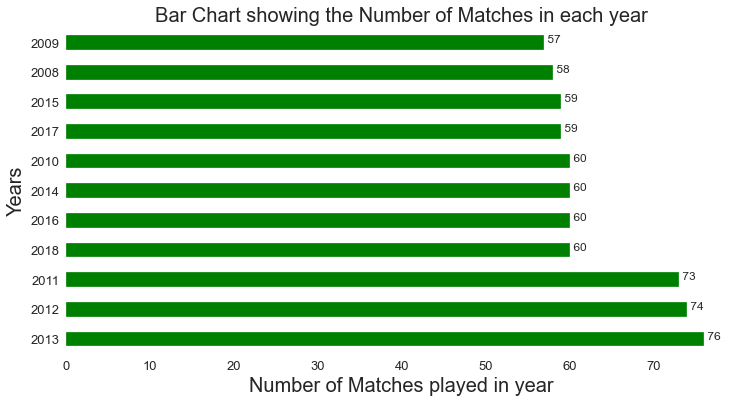

In [70]:
print('We have total', len(matches['season'].unique()),'years of data. Years are :',np.sort(matches['season'].unique()))
print('Minimum year is ',matches['season'].min(), 'and Miximum year is ',matches['season'].max())
print('Total matches are :',len(matches))

NoOfMatch = matches['season'].value_counts()
ax = NoOfMatch.plot.barh(figsize=(12,6),  colormap='ocean', fontsize=13, yticks=np.arange(0, 80, 4))
plt.ylabel('Years' ,fontsize=20)
plt.xlabel('Number of Matches played in year' ,fontsize=20)
plt.title('Bar Chart showing the Number of Matches in each year',fontsize=20 )
for index, value in enumerate(NoOfMatch):
    plt.text(value, index, " " + str(value),fontsize=12)
plt.show()


In [48]:
# # type(matches.groupby('winner', sort=True)['id'].count())
mostwon = matches.groupby('winner', sort=True)['id'].count().sort_values(ascending=False).head(1)
print('Team has won maximum matches:', mostwon.index[0],mostwon[0])

mostlose = matches.groupby('winner', sort=True)['id'].count().sort_values(ascending=False).tail(1)
print('Team has lose maximum matches:', mostlose.index[0],mostlose[0])

mostrun = matches.groupby('winner', sort=True)['win_by_runs'].max().sort_values(ascending=False).head(1)
print('Team has won by most run :', mostrun.index[0],mostrun[0])



Team has won maximum matches: Mumbai Indians 98
Team has lose maximum matches: Rising Pune Supergiants 5
Team has won by most run : Mumbai Indians 146


In [15]:
# sns.barplot(x='id',y='season',data=matches,order = matches['season'])

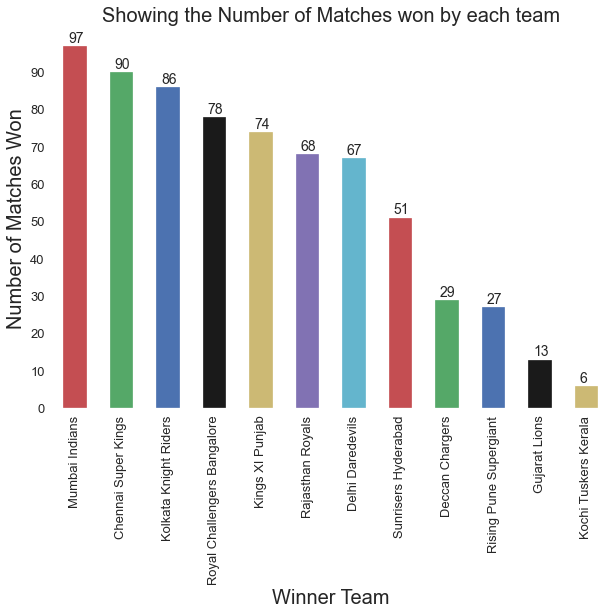

In [489]:
NoOfMatchWinner =  matches['winner'].value_counts()
NoOfMatchWinner.plot.bar(figsize=(10,7), color= list('rgbkymc') ,  fontsize=13, yticks=np.arange(0, 100, 10))
plt.xlabel('Winner Team',fontsize=20)
plt.ylabel('Number of Matches Won',fontsize=20)
plt.title('Showing the Number of Matches won by each team',fontsize=20)

for index, value in enumerate(NoOfMatchWinner):
    plt.text(index - 0.15,value + 1, str(value),fontsize=14)
# plt.show()
plt.savefig('MatchesWonByTeam_Bar.png')

#### Count the number of distinct responses and list them.

In [17]:
print("Count of distinct responses for City:", len(set(matches['city'])))      # Learn more about the variable city
print("Distinct responses for City:", set(matches['city']))                    

Count of distinct responses for City: 33
Distinct responses for City: {nan, 'Dharamsala', 'Cape Town', 'Kolkata', 'Port Elizabeth', 'Bloemfontein', 'Mumbai', 'Durban', 'Hyderabad', 'Jaipur', 'Nagpur', 'Indore', 'Visakhapatnam', 'Chennai', 'Centurion', 'Johannesburg', 'Kochi', 'Raipur', 'Sharjah', 'Rajkot', 'Delhi', 'Ahmedabad', 'Cuttack', 'Pune', 'Kimberley', 'Bangalore', 'Chandigarh', 'East London', 'Kanpur', 'Ranchi', 'Mohali', 'Bengaluru', 'Abu Dhabi'}


<a id=section307></a> 
### 3.7. Final observations 

- Variables to transform prior to analysis:
 - __Standardize__ all column headers to lower case (to prevent typos!)
  - __date__: convert to datetime
 - __city__: update missing values based on venue
 - __winner__: winner has wrong value where matched was tie or No Result
 - __umpire3__: ignoring now because no use in current excersize
- It will be important to decide how to handle NaN values.


<a id=section4></a> 
### 4. Data Normalization

### 4.1. Standardize all column headers to lower case 

In [149]:
matches.columns = map(str.lower, matches.columns) #all column header making lowercase     
matches.dtypes                                                                

id                 int64         
season             int64         
city               object        
date               datetime64[ns]
team1              object        
team2              object        
toss_winner        object        
toss_decision      object        
result             object        
dl_applied         int64         
winner             object        
win_by_runs        int64         
win_by_wickets     int64         
player_of_match    object        
venue              object        
umpire1            object        
umpire2            object        
umpire3            object        
dtype: object

<a id=section402></a> 
### 4.2. Convert "date"  datatype object to datetime

In [19]:
matches['date'] = pd.to_datetime(matches['date'])                        # Convert "timestamp" data type from object to datetime                      
matches.dtypes                                                               

id                 int64         
season             int64         
city               object        
date               datetime64[ns]
team1              object        
team2              object        
toss_winner        object        
toss_decision      object        
result             object        
dl_applied         int64         
winner             object        
win_by_runs        int64         
win_by_wickets     int64         
player_of_match    object        
venue              object        
umpire1            object        
umpire2            object        
umpire3            object        
dtype: object

<a id=section403></a>
### 4.3. Missing Data and its imputation

In [150]:
#missing data summary
total = matches.isnull().sum().sort_values(ascending=False)
# print('Missing Columns Data\n',total)
percent = ((matches.isnull().sum()/matches.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# missing_data.head(20)
print("Missing data summary")
print(missing_data)

Missing data summary
                 Total    Percent
umpire3          636    91.379310
player_of_match  3      0.431034 
winner           3      0.431034 
umpire1          1      0.143678 
umpire2          1      0.143678 
toss_winner      0      0.000000 
season           0      0.000000 
city             0      0.000000 
date             0      0.000000 
team1            0      0.000000 
team2            0      0.000000 
result           0      0.000000 
toss_decision    0      0.000000 
dl_applied       0      0.000000 
win_by_runs      0      0.000000 
win_by_wickets   0      0.000000 
venue            0      0.000000 
id               0      0.000000 


#### Missing data 
- __umpire3__  ignore column
- __city__ missing NaN data found in venue called dubai so updated based on venue

<a id=section404></a> 
### 4.4. Outliers Treatment

For the given dataset no finding any outliers data are very good. 
as date and season are critical part of data, data is between 2008 to 2018, 
cross check year of date and season should not less than 2008 and greater than 2018 



In [106]:
print('Outlier seasons count:',matches[(matches.season < 2008) | (matches.season > 2018) ].season.count())
print('Outlier dates count:',matches[(pd.DatetimeIndex(matches.date).year < 2008) | 
                                 (pd.DatetimeIndex(matches.date).year > 2018) ].season.count())


Outlier seasons count: 0
Outlier dates count: 0


<a id=section405></a>
### 4.5. Handling NaN data in the categorical columns
- There is other than __unpire3__, __city__ has 7 missing values. updating NaN mising value with appropriate city based on venue
- __winner__ column also has some wrong value , incase of match result is not normal updated with NaN
- __team1__ and __team2__ team name needs to correct

In [465]:
# matches.team1.unique()

# matches.loc[matches.team1.str.upper().str.contains('PUNE') > 0]
matches.loc[matches.team1.str.upper().str.contains('PUNE') > 0, "team1"] = "Rising Pune Supergiant"
matches.loc[matches.team2.str.upper().str.contains('PUNE') > 0, "team2"] = "Rising Pune Supergiant"
matches.loc[matches.toss_winner.str.upper().str.contains('PUNE') > 0, "toss_winner"] = "Rising Pune Supergiant"
matches.loc[matches.winner.str.upper().str.contains('PUNE') > 0, "winner"] = "Rising Pune Supergiant"

# print(matches['city'].unique())

In [464]:
matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,loser
116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN,Chennai Super Kings
82,83,2008,Jaipur,2008-05-04,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,normal,0,Rajasthan Royals,0,8,Sohail Tanvir,Sawai Mansingh Stadium,Asad Rauf,AV Jayaprakash,NaN,Chennai Super Kings
81,82,2008,Mumbai,2008-05-04,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,29,0,SM Pollock,Dr DY Patil Sports Academy,IL Howell,RE Koertzen,NaN,Delhi Daredevils
80,81,2008,Chandigarh,2008-05-03,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kings XI Punjab,9,0,IK Pathan,"Punjab Cricket Association Stadium, Mohali",DJ Harper,I Shivram,NaN,Kolkata Knight Riders
79,80,2008,Hyderabad,2008-05-25,Deccan Chargers,Royal Challengers Bangalore,Deccan Chargers,bat,normal,0,Royal Challengers Bangalore,0,5,R Vinay Kumar,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,RE Koertzen,NaN,Deccan Chargers


In [90]:
matches.team1.unique()

array(['Dr DY Patil Sports Academy', 'Sawai Mansingh Stadium',
       'Punjab Cricket Association Stadium, Mohali',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Feroz Shah Kotla',
       'Eden Gardens', 'M Chinnaswamy Stadium', 'Wankhede Stadium',
       'SuperSport Park', 'Buffalo Park', 'De Beers Diamond Oval',
       "St George's Park", 'New Wanderers Stadium', 'Kingsmead',
       'OUTsurance Oval', 'Newlands', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Himachal Pradesh Cricket Association Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha', 'Nehru Stadium',
       'Holkar Cricket Stadium', 'Subrata Roy Sahara Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex',
       'Dubai International Cricket Stadium', 'Sheikh Zayed Stadium',
       'Sharjah Cricket St

In [468]:
#Only found city were missing at venue Dubai International Cricket Stadium so update with Dubai
matches.loc[(matches.venue.str.contains('Dubai') > 0) & (matches.city.isnull()), "city"] = "Dubai"
print(matches['city'].unique())

print("Missing city count:",matches[matches.city.isnull()].city.count())

['Mumbai' 'Jaipur' 'Chandigarh' 'Hyderabad' 'Chennai' 'Delhi' 'Kolkata'
 'Bangalore' 'Centurion' 'East London' 'Kimberley' 'Port Elizabeth'
 'Johannesburg' 'Durban' 'Bloemfontein' 'Cape Town' 'Ahmedabad' 'Cuttack'
 'Dharamsala' 'Nagpur' 'Kochi' 'Indore' 'Pune' 'Visakhapatnam' 'Raipur'
 'Ranchi' 'Dubai' 'Abu Dhabi' 'Sharjah' 'Rajkot' 'Kanpur' 'Bengaluru'
 'Mohali']
Missing city count: 0


<a id=section406></a> 
### 4.6. Grouping
#### Winner and Looser grouping require so adding one column as looser



In [469]:
# Setting NaN to winner 
matches.result.unique()
matches[(matches.result != 'normal')].id.count()
matches.loc[matches.result != 'normal', "winner"] = np.nan
matches['loser'] = np.nan #added new loser column

In [470]:
print('winner count:',matches[matches.winner.isnull()].id.count(),' & loser count:',matches[matches.loser.isnull()].id.count())

winner count: 10  & loser count: 696


In [471]:
### updating loser for loser of the match
matches.loc[(matches.team1 != matches.winner),'loser'] = matches.team1
matches.loc[(matches.team2 != matches.winner),'loser'] = matches.team2
matches.loc[matches.winner.isnull(), "loser"] = np.nan
matches.loser.unique()

print('winner count:',matches[matches.winner.isnull()].id.count(),' & loser count:',matches[matches.loser.isnull()].id.count())

winner count: 10  & loser count: 10


In [472]:
#Checking result count
print(matches[matches.result == 'normal'].id.count(), matches[matches.result == 'tie'].id.count(),
matches[matches.result == 'no result'].id.count())
matches.result.unique()


686 7 3


array(['normal', 'tie', 'no result'], dtype=object)

#### Observations

__winner__ and __loser__ are more critical columns, so corrected based on result and verified

#### Pandas profiling post data manipulation

In [473]:
matches_new = matches.copy(deep=True)   #make a copy of original data   

In [474]:
post_profile = pandas_profiling.ProfileReport(matches_new)

In [475]:
post_profile.to_file("IPLMatches_post_profiling.html")

####  new dataframe for Label encoding

#### Dealing with Categorical Variables

In [477]:
from sklearn.preprocessing import LabelEncoder                                    # Label encoder is used to transform non-numerical labels to numerical labels.
number = LabelEncoder()                                                           # Here as our data set consists only of categorical values except age
for i in matches_new.columns:                                                          # in order to find the correlation between variables, we do Label encoding 
    matches_new[i] = number.fit_transform(matches_new[i].astype('str'))

In [478]:
matches_new.dtypes

id                 int32
season             int32
city               int32
date               int32
team1              int32
team2              int32
toss_winner        int32
toss_decision      int32
result             int32
dl_applied         int32
winner             int32
win_by_runs        int32
win_by_wickets     int32
player_of_match    int32
venue              int32
umpire1            int32
umpire2            int32
umpire3            int32
loser              int32
dtype: object

In [479]:
print(matches_new.result.unique(),matches.result.unique()) # 0 No result, 1 Normal,2  tie, 
# print(matches_new[matches_new.result == 0].result.count())
# print(matches[matches.result == 'no result'].result.count())
matches_new.team1.unique()

[1 2 0] ['normal' 'tie' 'no result']


array([ 0,  9,  6,  1, 10,  4,  8,  2,  7, 11,  3,  5])

In [130]:
number.fit(['No Result','Normal','Tie']) #['Yes','No','Maybe' -- 0,1,2]


LabelEncoder()

In [ ]:
# number.transform(['Yes','Maybe','No'])
# number.inverse_transform([0, 1, 2])

In [131]:
matches_new.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,loser
116,20,0,24,76,0,9,9,1,1,0,9,0,4,210,4,10,37,18,0
82,678,0,17,50,0,9,0,0,1,0,9,0,9,197,26,9,7,18,0
81,677,0,24,50,7,2,2,1,1,0,7,30,0,184,4,22,37,18,2
80,676,0,7,49,4,6,4,0,1,0,4,83,0,67,22,19,20,18,6
79,675,0,15,70,1,12,1,0,1,0,12,0,6,154,23,9,37,18,1


In [319]:
print(matches_new.result.unique())

[1 2 0]


<a id=section406><a/>

#### Correlation of Features

In [323]:
corr=matches_new.corr()['result']
corr[np.argsort(corr,axis=0)[::-1]]

result             1.000000
loser              0.091326
winner             0.088497
venue              0.054492
team1              0.022865
umpire3            0.012782
toss_winner       -0.002142
season            -0.007286
dl_applied        -0.008042
toss_decision     -0.009126
umpire2           -0.011700
date              -0.015360
team2             -0.016795
city              -0.020083
player_of_match   -0.030628
win_by_runs       -0.032275
id                -0.040495
umpire1           -0.045942
win_by_wickets    -0.047499
Name: result, dtype: float64

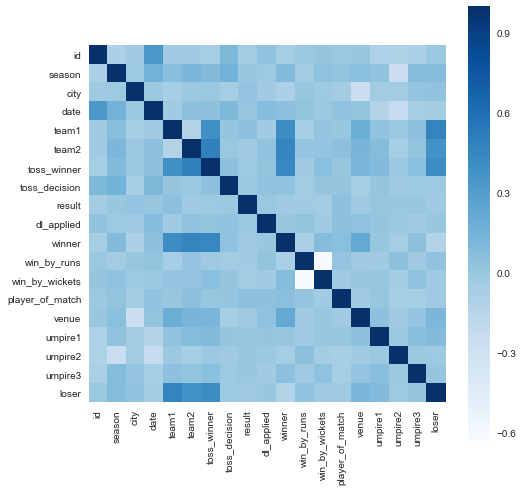

In [480]:
features_correlation = matches_new.corr()
plt.figure(figsize=(8,8))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

#### Observation

__benefits__ data are highly correlated

<a id=section5><a/>

### 5. Identify patterns in the data

<a id=section501><a/>

### 5.1. Toss Winner v. Winner

#### Observation

So based on heat map study __toss_winner__ and __winner__ are very much correlated.

In [135]:
df = pd.DataFrame({'Toss Winner': matches_new['toss_winner'], 'winner': matches_new['winner']}, dtype='category') # Create a new dataframe with the two columns and assign numbers in place of their categories
df_num = df.apply(lambda x: x.cat.codes)

print(df_num.corr())             # Run a correlation calculation 
print("")

             Toss Winner    winner
Toss Winner  1.000000     0.464792
winner       0.464792     1.000000



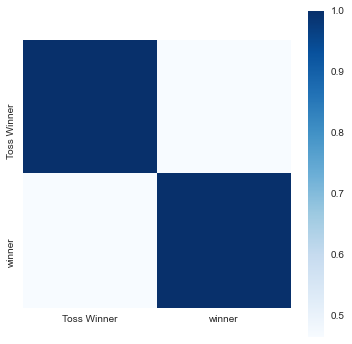

In [138]:
features = df_num.corr()
plt.figure(figsize=(6,6))
sns.heatmap(features,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

<a id=section502><a/>

### 5.2. Toss Decision v. Winner


So based on heat map study it looks __toss_decision__ and __winner__ are also very much correlated.


Text(0.5, 1.0, 'Winner vs Toss Decision')

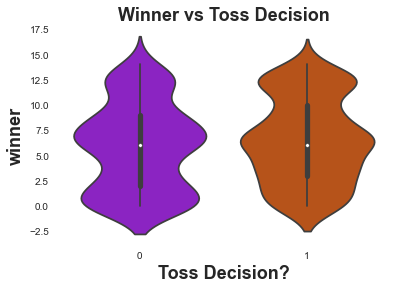

In [148]:
ax = sns.violinplot(x="toss_decision", y="winner", palette="gnuplot", data=matches_new)
plt.xlabel("Toss Decision?", fontsize=18, fontweight = "bold")
plt.ylabel("winner", fontsize=18, fontweight = "bold")
plt.title("Winner vs Toss Decision", fontsize=18, fontweight = "bold")

<a id=section503><a/>

### 5.3. Winner v. DL Applied

There appears to be a pretty clear correlation between these two variables, too.

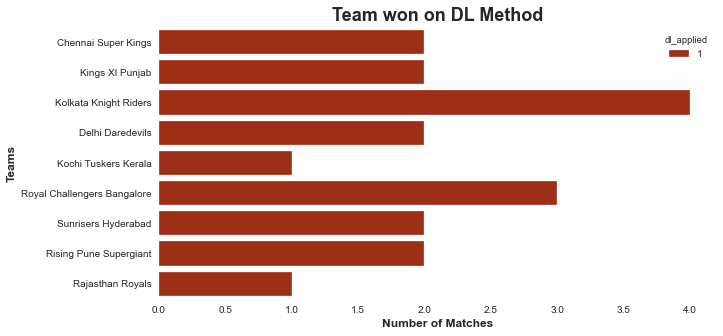

In [481]:
# DL_Data = matches[matches.dl_applied == 1].gro
# DL_Data = matches[matches.dl_applied == 1].value_count()
DL_Data = matches[matches.dl_applied == 1]
# print(DL_Data)
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y="winner", hue="dl_applied", ax=ax, data=DL_Data, palette="gnuplot")
plt.title("Team won on DL Method",fontsize=18,fontweight="bold")
plt.ylabel("Teams" ,fontsize=12,fontweight="bold")
plt.xlabel("Number of Matches" ,fontsize=12,fontweight="bold")
plt.show()

### Observation

The team 12 _having_ good record on winning on DL method.

### 5.4. Season vs Winner

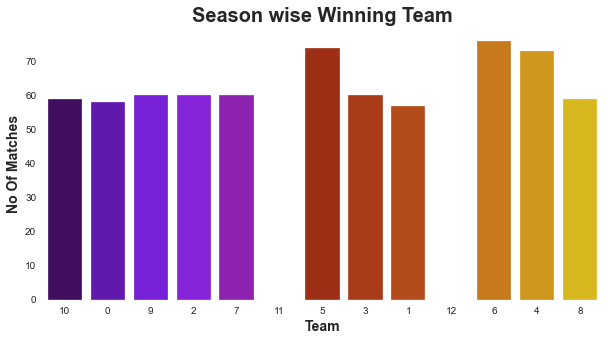

In [482]:
plt.figure(figsize=(10,5))
sns.countplot('season',data = matches_new, order = matches_new['winner'].value_counts().index,palette="gnuplot")
plt.title("Season wise Winning Team",fontsize=20,fontweight="bold")
plt.ylabel("No Of Matches", size=14,fontweight="bold")
plt.xlabel("Team" , size=14,fontweight="bold")
plt.show()

### Observation
The _maximum number_ of _matched won by __team5 and Team 12 & 13__ never won the matches.

<a id=section507><a/>

### 5.5.Using Donut pie chart to see the relationship between seasonwise match count.

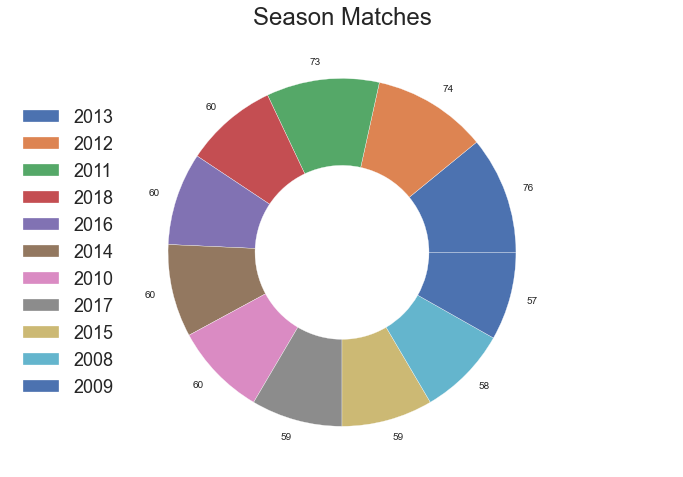

In [483]:
DonutData = matches.season.value_counts()
def Donut_value(val):
    a  = np.round(val/100*DonutData.sum(), 0)
    return a

fig, ax = plt.subplots()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 2.0, box.height * 2.0])



ax.axis('equal')
mypie, _ = ax.pie(DonutData, labels=DonutData,   radius=1.0) 
plt.setp( mypie, width=0.5, edgecolor='white')

plt.margins(0,5)
plt.title('Season Matches',size=24,pad=10)
plt.legend(DonutData.index,loc=6,prop={"size":18})
# show it
plt.show()

# explode = (0.1, 0, 0, 0, 0) 
# colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]
# plt.pie(matches_new.season.unique(), labels=matches_new.season.unique(), colors=colors,
#                      radius=3.3, autopct='%1.1f%%', shadow=True, startangle=140)
# plt.title("Season Matches", bbox={'facecolor':'0.8', 'pad':1})
# plt.show()

<a id=section508><a/>

<a id=section6></a>
### 6. Analysis through questions

<a id=section601><a/>

### 6.1.  What does the dataset contain?

Explore the __IPL__ dataset, we found almost 11 years of data (2008 to 2018), most of data are there, only few columns has missing data, most of the data are related and categorial. __umpire3__  has most missing value, but it not related to over problem so we can ignore that in this study. 

<a id=section602><a/>

#### 6.1.1. How many years of data are there in the dataset?

In [484]:
print('We have total', len(matches['season'].unique()),'years of data. Years are :',np.sort(matches['season'].unique()))
print('Minimum year is ',matches['season'].min(), 'and Miximum year is ',matches['season'].max())


We have total 11 years of data. Years are : [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
Minimum year is  2008 and Miximum year is  2018


#### 6.1.2. How many matches are there in the dataset?

Total matches are : 696


Text(0.5, 1.0, 'Bar Chart showing the Number of Matches in each year')

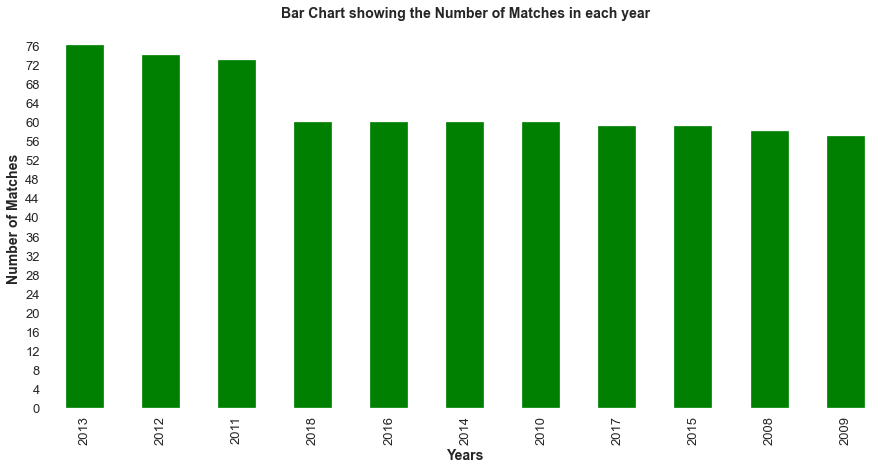

In [485]:
print('Total matches are :',len(matches))
matches['season'].value_counts().plot.bar(figsize=(15,7), colormap='ocean', fontsize=13, yticks=np.arange(0, 80, 4))
plt.xlabel('Years', size=14,fontweight="bold")
plt.ylabel('Number of Matches', size=14,fontweight="bold")
plt.title('Bar Chart showing the Number of Matches in each year',pad = 10, size=14,fontweight="bold")

### Observation
**Based on above data we can see Number of matches played in each years, and 2013 has most matches while 2009 has least one, total matches are dataset has 696**

<a id=section604><a/>

#### 6.1.3 Which Team had won / lose maximum matches?

Team has won maximum matches: Mumbai Indians 97
Team has lose maximum matches: Kochi Tuskers Kerala 8
Won by most run 146 by Mumbai Indians
Lost by most run 146 by Delhi Daredevils


Text(0.5, 1.0, 'Bar Chart showing the Number of Matches won by each team')

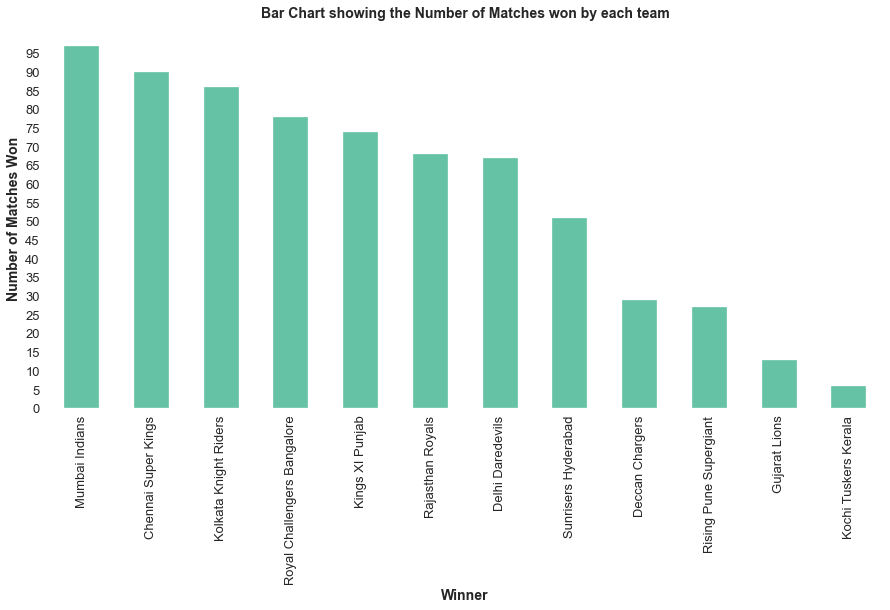

In [486]:
mostwon = matches.groupby('winner', sort=True)['id'].count().sort_values(ascending=False).head(1)
print('Team has won maximum matches:', mostwon.index[0],mostwon[0])

mostlose = matches.groupby('loser', sort=True)['id'].count().sort_values(ascending=False).tail(1)
print('Team has lose maximum matches:', mostlose.index[0],mostlose[0])

# mostrun = matches[['winner','win_by_runs']].sort_values(by=['win_by_runs'], ascending=False).head(5)
# mostrun.head(1).winner
mostrun = matches.groupby('winner', sort=True)['win_by_runs'].max().sort_values(ascending=False).head(5)
print('Won by most run', mostrun[0],'by',mostrun.index[0])


# leastrun = matches[['loser','win_by_runs']].sort_values(by=['win_by_runs'], ascending=False).head(5)
leastrun = matches.groupby('loser', sort=True)['win_by_runs'].max().sort_values(ascending=False).head(5)
print('Lost by most run', leastrun[0],'by',leastrun.index[0])

matches['winner'].value_counts().plot.bar(figsize=(15,7), colormap='Set2', fontsize=13, yticks=np.arange(0, 100, 5))
plt.xlabel('Winner', size=14,fontweight="bold")
plt.ylabel('Number of Matches Won', size=14,fontweight="bold")
plt.title('Bar Chart showing the Number of Matches won by each team',pad = 10, size=14,fontweight="bold")

<a id=section605><a/>

#### 6.1.4. Which Team had won/lose matches by maximum runs? Top 5 Big wins & Top 5 Big Loses

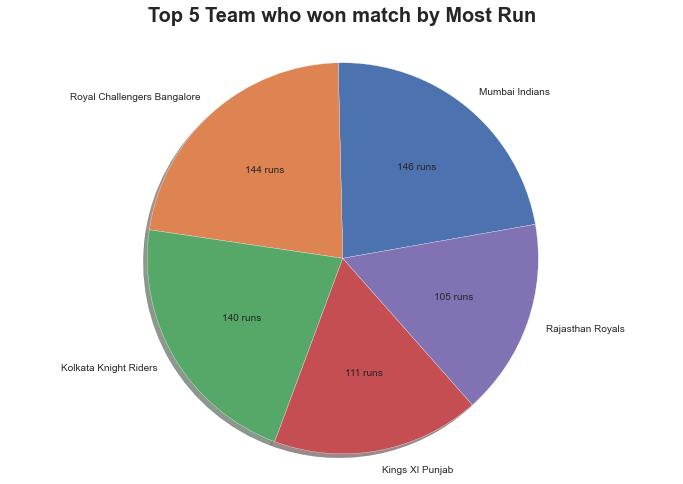

Top 5 Team who won match by Most Run winner
Mumbai Indians                 146
Royal Challengers Bangalore    144
Kolkata Knight Riders          140
Kings XI Punjab                111
Rajasthan Royals               105
Name: win_by_runs, dtype: int64


In [487]:
#Top 5 Team who won match by Most Run

def Auto_WonMatch(val):
    a  = np.round(val/100.*mostrun.sum(), 0)
    return str(int(a)) + ' runs'

fig1, ax1 = plt.subplots()
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 2.0, box.height * 2.0])
ax1.pie(mostrun, labels=mostrun.index, autopct=Auto_WonMatch,  shadow=True, startangle=10)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Top 5 Team who won match by Most Run",size =20, pad=20,fontweight="bold")
plt.show()
print('Top 5 Team who won match by Most Run', mostrun)
# plt.savefig('WonMostRun.png')


Top 5 Team who lost match by Most Run loser
Delhi Daredevils               146
Gujarat Lions                  144
Royal Challengers Bangalore    140
Kings XI Punjab                138
Rising Pune Supergiant         130
Name: win_by_runs, dtype: int64


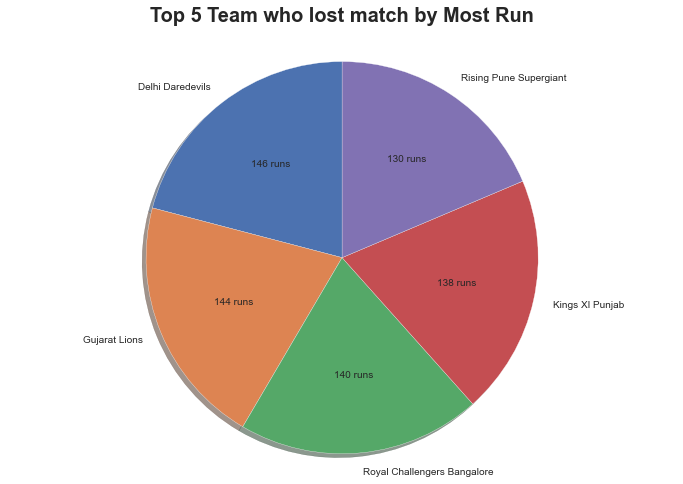

In [488]:
#Top 5 Team who lost match by Most Run
print('Top 5 Team who lost match by Most Run', leastrun)
def Auto_LostMatch(val):
    a  = np.round(val/100.*leastrun.sum(), 0)
    return str(int(a)) + ' runs'

fig1, ax1 = plt.subplots()
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 2.0, box.height * 2.0])

ax1.pie(leastrun,  labels=leastrun.index, autopct=Auto_LostMatch, shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Top 5 Team who lost match by Most Run",size =20, pad=20,fontweight="bold")
plt.show()
# plt.savefig('LostMostRun.png')

#### 6.1.5. Who won the maximum times player of the match awards?

Text(0.5, 1.0, 'Chart showing Best Player who won more than 10 Player of the Match awards')

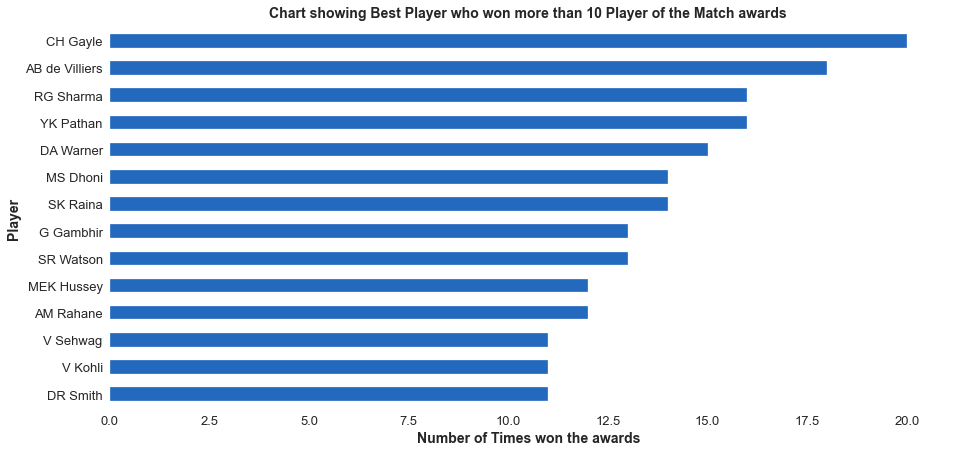

In [499]:
PL_MT = matches['player_of_match'].value_counts().sort_values(ascending=True)
PL_MT = PL_MT[PL_MT>10]
PL_MT.plot.barh(figsize=(15,7), colormap='vlag', fontsize=13, yticks=np.arange(0, 22, 2))
plt.xlabel('Number of Times won the awards', size=14,fontweight="bold")
plt.ylabel('Player', size=14,fontweight="bold")
plt.title('Chart showing Best Player who won more than 10 Player of the Match awards',pad = 10, size=14,fontweight="bold")

<a id=section608><a/>

### 6.2. Which team doing better in DL Method.

Explore the __DL Method applied match__ data and finding best Team doing in DL and who get benifits Bat first or ball first.

#### 6.2.1. In DL Method which team has more success?

Teams won maximum matches during DL winner
Kolkata Knight Riders          4
Royal Challengers Bangalore    3
Sunrisers Hyderabad            2
Rising Pune Supergiant         2
Kings XI Punjab                2
Delhi Daredevils               2
Chennai Super Kings            2
Rajasthan Royals               1
Kochi Tuskers Kerala           1
Name: id, dtype: int64


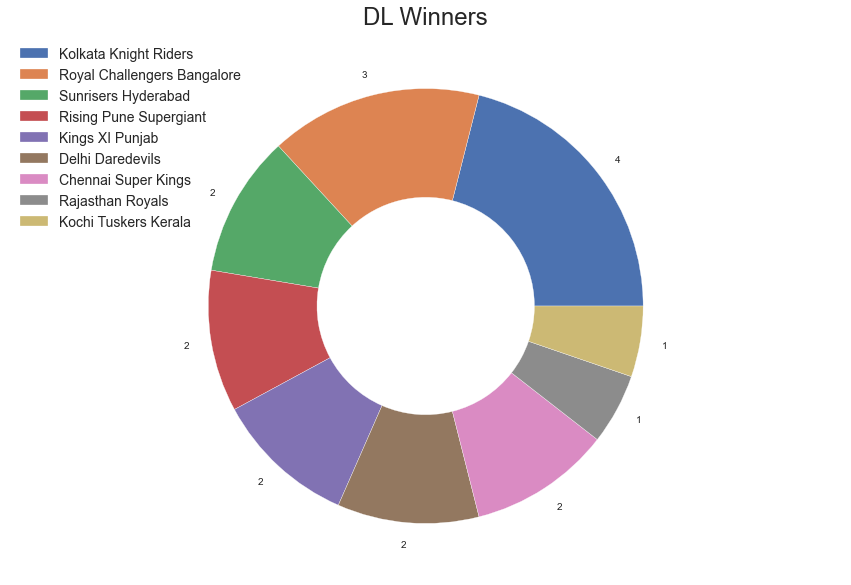

In [490]:
most_DLwon = matches[matches.dl_applied == 1].groupby('winner', sort=True)['id'].count().sort_values(ascending=False)
print('Teams won maximum matches during DL', most_DLwon)

fig, ax = plt.subplots()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 2.5, box.height * 2.5])



ax.axis('equal')
mypie, _ = ax.pie(most_DLwon, labels=most_DLwon,   radius=1.0) 
plt.setp( mypie, width=0.5, edgecolor='white')

plt.margins(0,5)
plt.title('DL Winners',size=24,pad=10)
plt.legend(most_DLwon.index,loc=2,prop={"size":14})
# show it


plt.show()

#### 6.2.2. In DL Method who won most bat first or field first team?

In [217]:
matches.toss_decision.unique()
matches.toss_winner.unique()

array(['Rajasthan Royals', 'Chennai Super Kings', 'Delhi Daredevils',
       'Kings XI Punjab', 'Deccan Chargers',
       'Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Mumbai Indians', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Sunrisers Hyderabad', 'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant'], dtype=object)

Text(0.5, 1.0, 'Showing DL Winning Ratio of Toss decision Bat or Field')

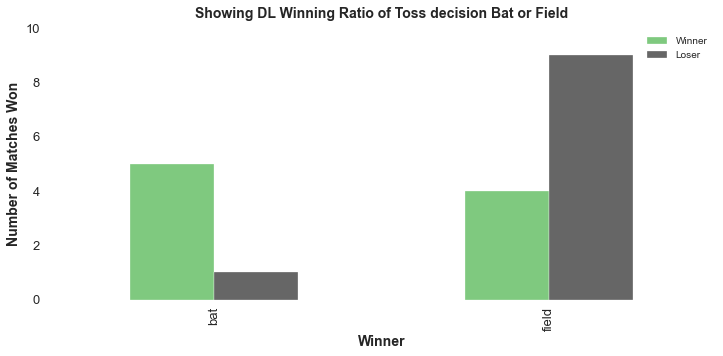

In [446]:
DL_LOOSE = matches[(matches.dl_applied == 1) & (matches.winner == matches.toss_winner)].groupby('toss_decision')['toss_decision'].count()
DL_WON = matches[(matches.dl_applied == 1) & (matches.winner != matches.toss_winner)].groupby('toss_decision')['toss_decision'].count()
# type(DL_WON)
# print('Total matches are :',len(DL_BAT))
# print("DL Matches:",matches[(matches.dl_applied == 1)].count()[0],"\nWon",DL_LOOSE,"\nLose",DL_WON)

DL_FINAL = pd.DataFrame(columns = ['Winner', 'Loser'])
DL_FINAL['Winner'] = DL_WON
DL_FINAL['Loser'] = DL_LOOSE



DL_FINAL.plot.bar(figsize=(12,5), colormap='Accent', fontsize=13, yticks=np.arange(0, 12, 2))
plt.xlabel('Winner', size=14,fontweight="bold")
plt.ylabel('Number of Matches Won', size=14,fontweight="bold")
plt.title('Showing DL Winning Ratio of Toss decision Bat or Field',pad =10, size=14,fontweight="bold")

<a id=section7></a> 

### Conclusion

- This is first analysis of dataset, once no of years finalized, will get more accurate result
- This dataset has good information to predict future matches output based data.
- We can see Mumbai Indians has performed well
- Gayle has performed well and received 20 Player of the matches
- DL Rules - KKR doing good
- DL Rules - Team has decided to Bat First and DL applied, chances of winning is high compare to field first

     As we have not filtered data and IPL depends on players, the players are shuffling in IPL auction, this will 
  help only if team remain same, otherwise predection will be wrong.